In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import pandas_ta as ta
import seaborn as sns
import yfinance as yf

In [2]:
data = yf.download(
    "ENKAI.IS", period="max", interval="5m", start="2021-08-01"
)  # Start date must be within the last 60 days for 5m frequency.
data.drop(["Close"], axis=1, inplace=True)
data.rename(columns={"Adj Close": "Close"}, inplace=True)
data.index.name = "Date"
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-08-02 09:55:00+03:00,9.22,9.22,9.22,9.22,0
2021-08-02 10:00:00+03:00,9.23,9.24,9.20,9.22,49094
2021-08-02 10:05:00+03:00,9.22,9.23,9.21,9.22,26995
2021-08-02 10:10:00+03:00,9.22,9.22,9.21,9.22,24495
2021-08-02 10:15:00+03:00,9.21,9.23,9.20,9.20,56840
...,...,...,...,...,...
2021-09-03 17:05:00+03:00,10.54,10.54,10.53,10.53,18196
2021-09-03 17:10:00+03:00,10.53,10.54,10.52,10.54,20371
2021-09-03 17:15:00+03:00,10.54,10.55,10.52,10.52,23118


In [3]:
# Calculate VWAP with pandas_ta
vwap = data.ta.vwap()

C:\Users\murat\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


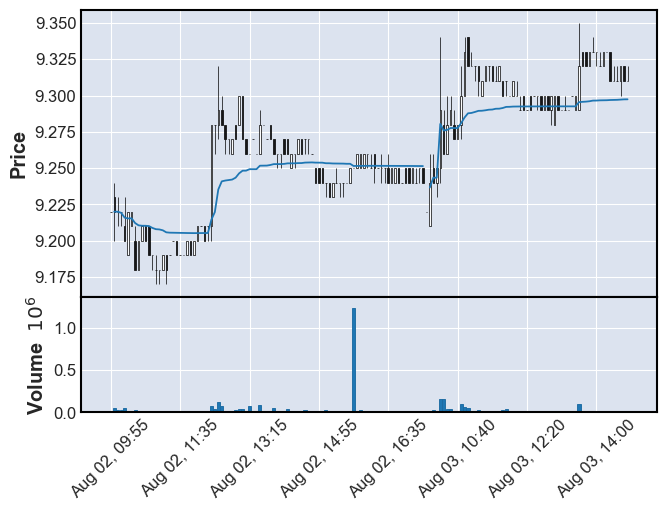

In [4]:
n = 150
mpf.plot(data.iloc[:n], volume=True, type="candle",
         addplot=mpf.make_addplot(vwap[:n]))